In [68]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 4

In [69]:
img1 = cv.imread('data/stopSignSample.jpg',cv.IMREAD_GRAYSCALE)          # queryImage
img2 = cv.imread('data/stopSignSample2.jpg',cv.IMREAD_GRAYSCALE) # trainImage
sift = cv.xfeatures2d.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

flann = cv.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# store all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)        


In [71]:
if len(good)>MIN_MATCH_COUNT:
    src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ]).reshape(-1,1,2)
    dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ]).reshape(-1,1,2)

    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC,5.0)
    matchesMask = mask.ravel().tolist()
    
    print(M)

    h,w = img1.shape
    pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
    dst = cv.perspectiveTransform(pts,M)

#     img2 = cv.polylines(img2,[np.int32(dst)],True,255,3, cv.LINE_AA)

else:
    print "Not enough matches are found - %d/%d" % (len(good),MIN_MATCH_COUNT)
    matchesMask = None


[[ 7.20720833e-01  6.64720464e-03  4.18108068e+02]
 [-8.94528710e-02  9.00055281e-01  2.10953506e+01]
 [-2.08380821e-04 -9.95555350e-06  1.00000000e+00]]


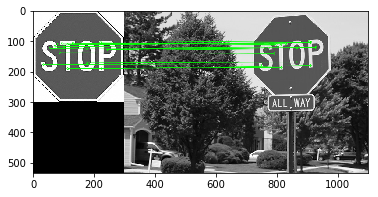

(<matplotlib.image.AxesImage at 0x1271066d0>, None)

In [72]:
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask, # draw only inliers
                   flags = 2)

img3 = cv.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

[150 250   1]
[200 250   1]
[200 200   1]
[150 200   1]


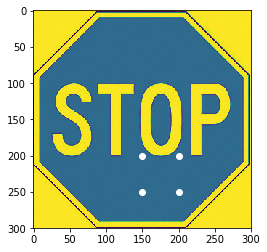

In [87]:


points = []
points.append(np.asarray([150,250,1]))
points.append(np.asarray([200,250,1]))
points.append(np.asarray([200,200,1]))
points.append(np.asarray([150,200,1]))
plt.figure(0)
plt.imshow(img1)
for point in points:
    print(point)
    plt.plot(point[0],point[1], 'o', color="white");

In [88]:



transposedPoints = []

for point in points:
    transposedPoints.append(np.dot(M,point.transpose()))

print(transposedPoints)

[array([527.87799428, 232.69124014,   0.96625399]), array([563.91403594, 228.21859659,   0.95583495]), array([563.58167571, 183.21583256,   0.95633273]), array([527.54563405, 187.68847611,   0.96675177])]


[527.87799428 232.69124014   0.96625399]
[563.91403594 228.21859659   0.95583495]
[563.58167571 183.21583256   0.95633273]
[527.54563405 187.68847611   0.96675177]


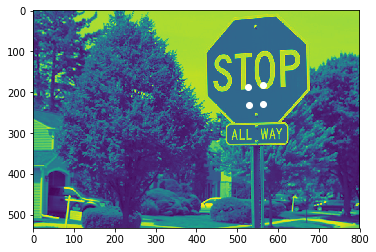

In [89]:
plt.figure(1)
plt.imshow(img2)
for point in transposedPoints:
    print(point)
    plt.plot(point[0],point[1], 'o', color="white");